#### Data Understanding and Initial Assessment

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import sys

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [19]:
df = pd.read_csv("../data/raw/heart_disease_data.csv")

#### Basic Information

In [20]:
# Shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 918, Columns: 12


In [21]:
# Columns and respective data types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [22]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [24]:
# Numeric columns have high skew
df.select_dtypes(include=[np.number]).drop('HeartDisease',axis=1).skew()


Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
FastingBS      1.264484
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [25]:
# Resting BP and Oldpeak has high kurtosis meaning more outliers possibly
df.select_dtypes(include=[np.number]).drop('HeartDisease',axis=1).kurtosis()

Age           -0.386140
RestingBP      3.271251
Cholesterol    0.118208
FastingBS     -0.401960
MaxHR         -0.448248
Oldpeak        1.203064
dtype: float64

In [26]:
# sample rows 
df.head().T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


#### Data Quality

In [27]:
## Missing Data  = There is no missing data in the dataset
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [28]:
# All columns have >= 2 unique values
df.columns[df.nunique() > 10]

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [29]:
## Columns with medical readings should not have 0 (all results were from alive people)

for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'HeartDisease':
        zero_count = (df[col] == 0).sum()
        zero_pct = (zero_count / len(df)) * 100

        print(f"{col} - zero-value statistics: {zero_count} ({zero_pct}%) ")

#cholesterol having 0s means missing values

Age - zero-value statistics: 0 (0.0%) 
RestingBP - zero-value statistics: 1 (0.10893246187363835%) 
Cholesterol - zero-value statistics: 172 (18.736383442265794%) 
FastingBS - zero-value statistics: 704 (76.68845315904139%) 
MaxHR - zero-value statistics: 0 (0.0%) 
Oldpeak - zero-value statistics: 368 (40.08714596949891%) 


In [30]:
## Check ranges
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']:
    print(f"{col} - max: {df[col].max()}, min: {df[col].min()}")

Age - max: 77, min: 28
RestingBP - max: 200, min: 0
Cholesterol - max: 603, min: 0
MaxHR - max: 202, min: 60


#### Categorical Summary

In [31]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(df[col].value_counts())
    value_counts = df[col].value_counts()
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most Frequent Value: {value_counts.index[0] if len(value_counts) > 0 else None}")
    print(f"Most Frequent Value Count: {value_counts.iloc[0] if len(value_counts) > 0 else 0}")
    print(f"Most Frequent Percent: {round((value_counts.iloc[0] / len(df)) * 100, 2) if len(value_counts) > 0 else 0}")
    print(f"Categories: {', '.join(map(str, value_counts.index[:5].tolist()))}")
    print("\n")
        
    

Sex
M    725
F    193
Name: count, dtype: int64
Unique values: 2
Most Frequent Value: M
Most Frequent Value Count: 725
Most Frequent Percent: 78.98
Categories: M, F


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
Unique values: 4
Most Frequent Value: ASY
Most Frequent Value Count: 496
Most Frequent Percent: 54.03
Categories: ASY, NAP, ATA, TA


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
Unique values: 3
Most Frequent Value: Normal
Most Frequent Value Count: 552
Most Frequent Percent: 60.13
Categories: Normal, LVH, ST


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Unique values: 2
Most Frequent Value: N
Most Frequent Value Count: 547
Most Frequent Percent: 59.59
Categories: N, Y


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
Unique values: 3
Most Frequent Value: Flat
Most Frequent Value Count: 460
Most Frequent Percent: 50.11
Categories: Flat, Up, Down




#### Target Variable Analysis

In [32]:
# No class imbalance
target_counts = df['HeartDisease'].value_counts().sort_index()
(target_counts / len(df) * 100).round(2).to_dict(),

({0: 44.66, 1: 55.34},)

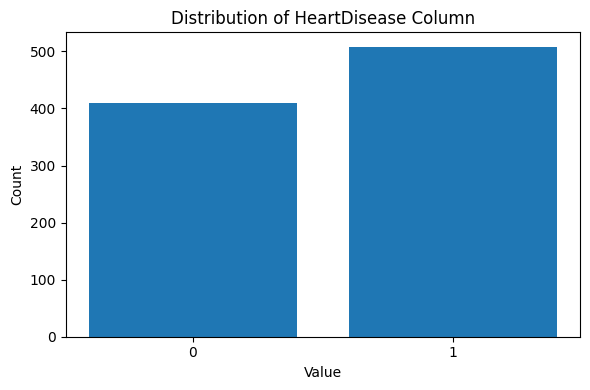

In [33]:
value_counts = df['HeartDisease'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of HeartDisease Column')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

In [34]:
#imbalance_ratio
round(target_counts.max() / target_counts.min(), 2)

np.float64(1.24)

In [35]:
# Class Imbalance Test
abs(target_counts.iloc[0] - target_counts.iloc[1]) / len(df) < 0.1 if len(target_counts) == 2 else None

np.False_